<a href="https://colab.research.google.com/github/Thikshaya555/machinelearning/blob/master/autoencoding2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow==1.14.0

In [ ]:
x_train[0]

NameError: ignored

In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
#this program classifies the images
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import SGD,Adam,RMSprop
import matplotlib.pyplot as plt

IMG_CHANNELS=3
IMG_ROWS=32
IMG_COLS=32

BATCH_SIZE=128
NB_EPOCH=20
NB_CLASSES=10
VERBOSE=1
VALIDATION_SPLIT=0.2
OPTIM=RMSprop()
#load the data set into variable x_train( the variable that contains images to train on)y_train(contains labels of the image to train)x_test,y_test
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
#explore the data set knowing the type of data that we are working with
print(type(x_train))
print(x_train.ndim)
print(x_train.shape)
print(x_train.size)
print(x_train.dtype)
print(type(y_train))
print(y_train.ndim)
print(y_train.shape)
print(y_train.size)
print(y_train.dtype)
print(type(x_test))
print(x_test.ndim)
print(x_test.shape)
print(x_test.size)
print(x_test.dtype)
print(type(y_test))
print(y_test.ndim)
print(y_test.shape)
print(y_test.size)
print(y_test.dtype)
print('x_train shape:',x_train.shape)
print('x_train shape:',x_test.shape)
print('x_train shape:',y_train.shape)
print('x_train shape:',y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
<class 'numpy.ndarray'>
4
(50000, 32, 32, 3)
153600000
uint8
<class 'numpy.ndarray'>
2
(50000, 1)
50000
uint8
<class 'numpy.ndarray'>
4
(10000, 32, 32, 3)
30720000
uint8
<class 'numpy.ndarray'>
2
(10000, 1)
10000
int64
x_train shape: (50000, 32, 32, 3)
x_train shape: (10000, 32, 32, 3)
x_train shape: (50000, 1)
x_train shape: (10000, 1)


In [ ]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#the first image in the dataset
x_train[0]
#this shows the image as an array ,rgb(pixel) values
#first array list colour is mantle(dark greyish lime colour)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

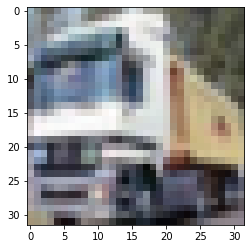

In [ ]:
import matplotlib.pyplot as plt
img=plt.imshow(x_train[1])

In [ ]:
#the label of the image is
print("the label is",y_train[0])

the label is [6]


In [ ]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

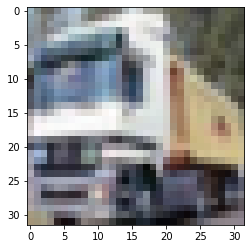

In [ ]:
import matplotlib.pyplot as plt
img=plt.imshow(x_train[1])

In [ ]:
#the label of the image is
print("the label is",y_train[1])

the label is [9]


In [ ]:
#data processing
#one hot encoding is performed
y_train=np_utils.to_categorical(y_train,NB_CLASSES)
y_test=np_utils.to_categorical(y_test,NB_CLASSES)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(IMG_ROWS,IMG_COLS,IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,25))


In [ ]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)              

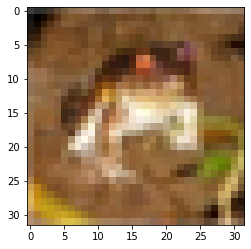

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=10,validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
score=model.evaluate(x_test,y_test,batch_size=BATCH_SIZE,verbose=VERBOSE)
print("test score:",score[0])
print("test accuracy",score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 61s 2ms/step - loss: 1.7718 - accuracy: 0.3845 - val_loss: 1.3638 - val_accuracy: 0.5318
Epoch 2/10
40000/40000 [==============================] - 61s 2ms/step - loss: 1.3606 - accuracy: 0.5156 - val_loss: 1.2484 - val_accuracy: 0.5663
Epoch 3/10
40000/40000 [==============================] - 61s 2ms/step - loss: 1.2175 - accuracy: 0.5696 - val_loss: 1.1641 - val_accuracy: 0.5837
Epoch 4/10
40000/40000 [==============================] - 61s 2ms/step - loss: 1.1187 - accuracy: 0.6076 - val_loss: 1.1109 - val_accuracy: 0.6124
Epoch 5/10
40000/40000 [==============================] - 60s 1ms/step - loss: 1.0389 - accuracy: 0.6378 - val_loss: 1.1037 - val_accuracy: 0.6164
Epoch 6/10
40000/40000 [==============================] - 60s 2ms/step - loss: 0.9719 - accuracy: 0.6618 - val_loss: 1.0636 - val_accuracy: 0.6317
Epoch 7/10
40000/40000 [==============================] - 60s 2ms/st

In [ ]:
from google.colab import files
uploaded=files.upload()
my_image=plt.imread('airoplane.jpg')

Saving airoplane.jpg to airoplane.jpg


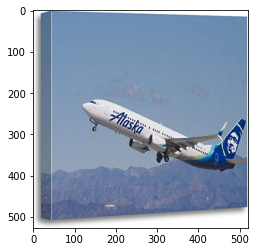

In [ ]:
img=plt.imshow(my_image)

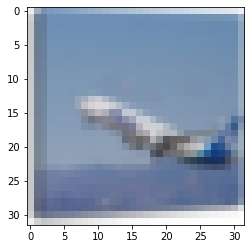

In [ ]:
from skimage.transform import resize
my_image_resized=resize(my_image,(32,32,3))
img=plt.imshow(my_image_resized)

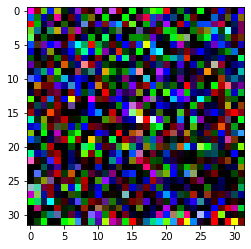

In [ ]:
import numpy as np
noise_factor=0.1
noise_image1=my_image_resized*np.random.randn(*(32,32,3))
noise_image1=np.clip(noise_image1,0,1)
plt.imshow(noise_image1,cmap='gray')

In [ ]:
import numpy as np
probabilities=model.predict(np.array([noise_image1,]))

probabilities

array([[3.4641135e-07, 9.9007040e-01, 2.1877092e-04, 3.8385983e-09,
        8.8265532e-12, 2.4306670e-09, 1.7494604e-07, 2.4844653e-07,
        1.8224544e-10, 9.7101321e-03]], dtype=float32)

In [ ]:
number_to_class=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index=np.argsort(probabilities[0,:])
print('most likely class',number_to_class[index[9]],'--probability:',probabilities[0,index[9]])

most likely class automobile --probability: 0.9900704


In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


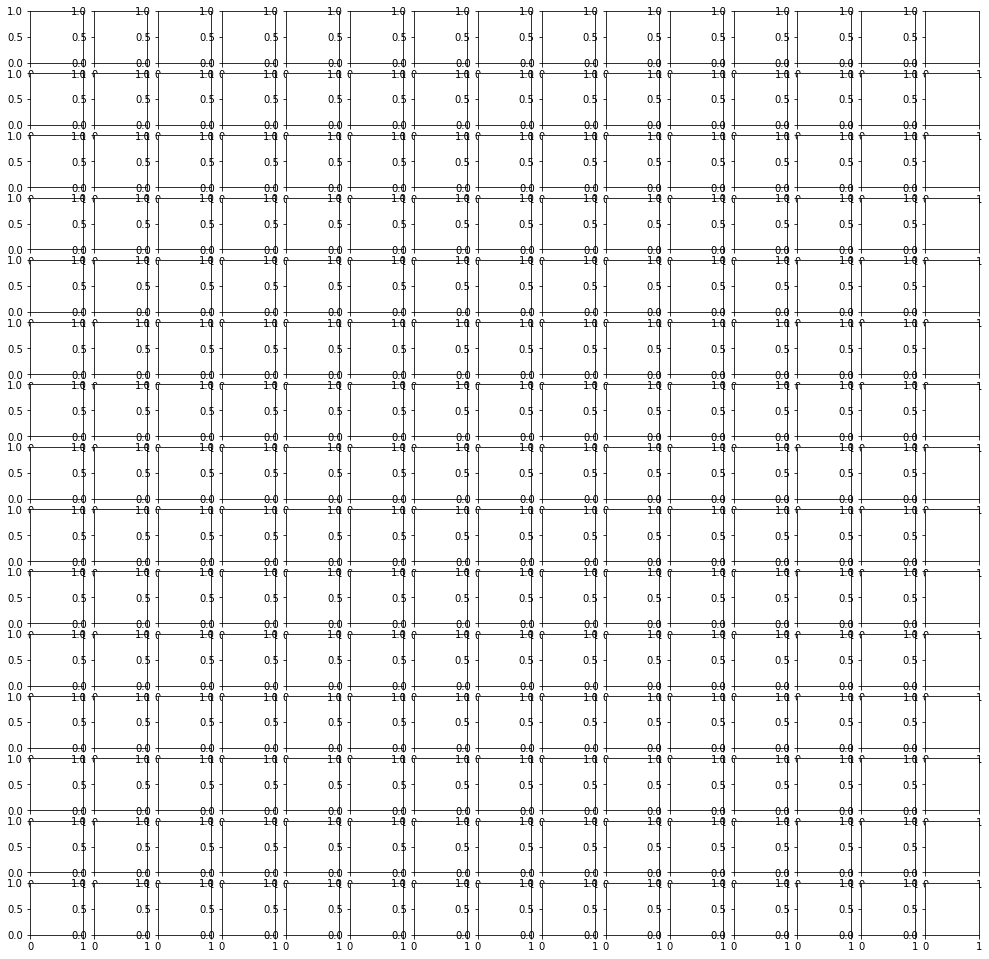

In [ ]:
w_grid=15
l_grid=15
fig,axes=plt.subplots(l_grid,w_grid,figsize=(17,17))
axes=axes.ravel()
n_training=len(x_train)

In [ ]:
for i in np.arange(0,w_grid*l_grid):
  index=np.random.randint(0,n_training)
  axes[i].imshow(x_train[index])
  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index],fontsize=8)
  axes[i].axis('off')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


In [ ]:
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255

In [ ]:
x_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [ ]:
noise_factor=0.1
noise_dataset=[]
for img in x_train:
  noisy_image = img+noise_factor*np.random.randn(*img.shape)
  noisy_image=np.clip(noisy_image,0,1)
  noise_dataset.append(noisy_image)

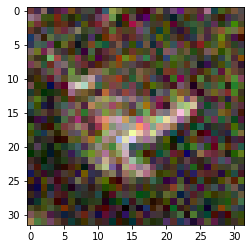

In [ ]:
plt.imshow(noise_dataset[22],cmap='gray')

In [ ]:
#add noise to the test data
noise_factor=0.1
noise_test_dataset=[]
for img in x_test:
  noisy_image = img+noise_factor*np.random.randn(*img.shape)
  noisy_image=np.clip(noisy_image,0,1)
  noise_test_dataset.append(noisy_image)


In [ ]:
autoencoder=tf.keras.models.Sequential()

In [ ]:
autoencoder.add(tf.keras.layers.Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))

In [ ]:
autoencoder.add(tf.keras.layers.Conv2D(16,(3,3),padding='same'))
autoencoder.add(tf.keras.layers.Conv2D(16,(3,3),padding='same'))
#decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(32,(3,3),padding='same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(3,(3,3),activation='sigmoid',padding='same'))

In [ ]:
autoencoder.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        4624      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 3)         867       
Total params: 13,347
Trainable params: 13,347
Non-trainable params: 0
_________________________________________________________________


In [ ]:
noise_dataset=np.array(noise_dataset)

In [ ]:
noise_test_dataset=np.array(noise_test_dataset)

In [ ]:
autoencoder.fit(noise_image1.reshape(-1,32,32,3),
                my_image_resized.reshape(-1,32,32,3),
                epochs=5,
                batch_size = 200,
                validation_data=(noise_test_dataset.reshape(-1,32,32,3),x_test.reshape(-3,32,32,3)))


Epoch 1/5
1/1 [==============================] - 16s 16s/step - loss: 0.6966 - val_loss: 0.6969
Epoch 2/5
1/1 [==============================] - 14s 14s/step - loss: 0.6831 - val_loss: 0.7439
Epoch 3/5
1/1 [==============================] - 14s 14s/step - loss: 0.6756 - val_loss: 0.8325
Epoch 4/5
1/1 [==============================] - 14s 14s/step - loss: 0.6763 - val_loss: 0.8716
Epoch 5/5
1/1 [==============================] - 14s 14s/step - loss: 0.6778 - val_loss: 0.8493


In [ ]:
evaluation=autoencoder.evaluate(noise_image1.reshape(-3,32,32,3),my_image_resized.reshape(-3,32,32,3))
print('test accuracy:(:3f)',format(evaluation))

1/1 [==============================] - 0s 1ms/step - loss: 0.6754
test accuracy:(:3f) 0.6754195094108582


In [ ]:
predicted=autoencoder.predict(noise_image1.reshape(-3,32,32,3))

NameError: ignored

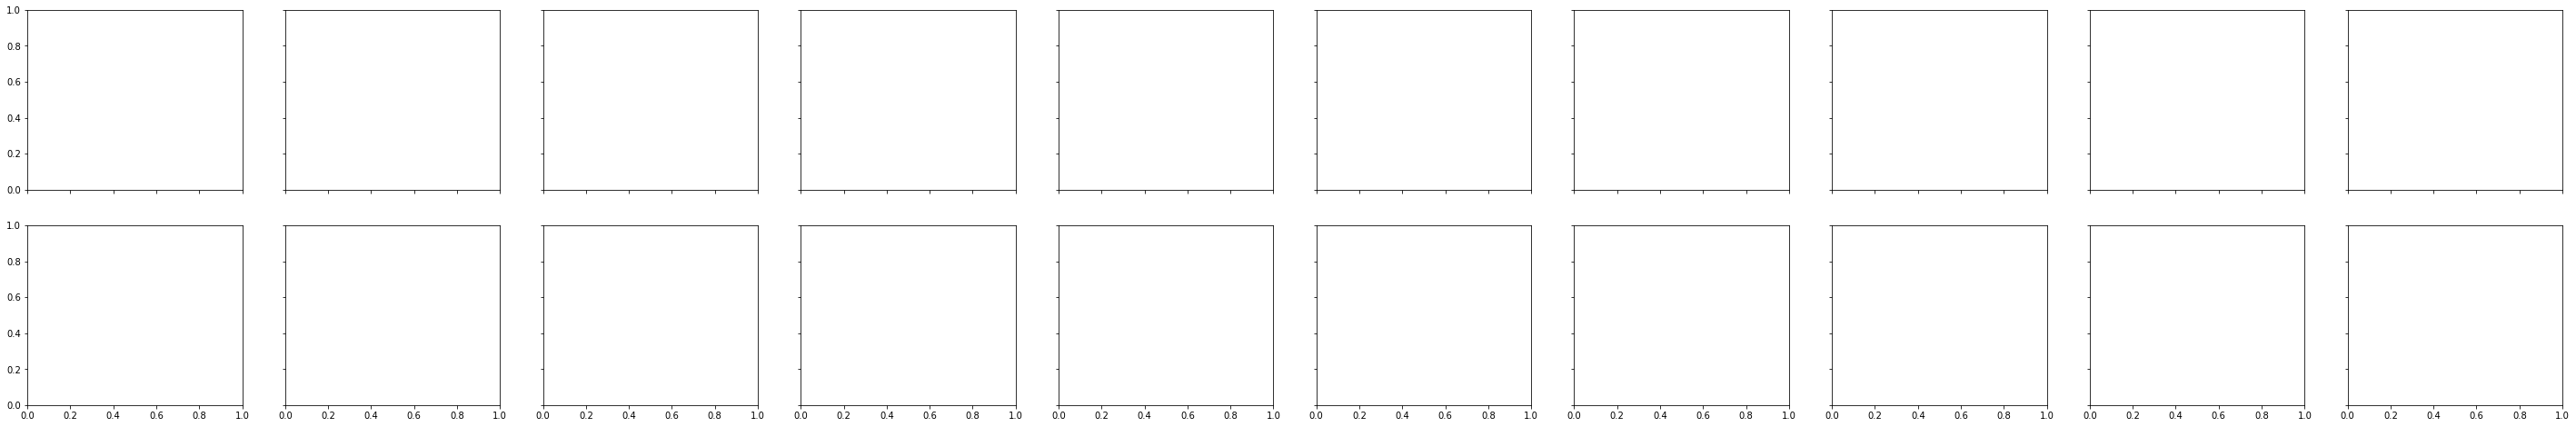

In [ ]:
fig,axes=plt.subplots(nrows=2,ncols=10,sharex=True,sharey=True,figsize=(50,8))
for images,row in zip([noise_image,predicted],axes):
  for img,ax in zip(images,row):
    ax.imshow(img.reshape((32,32,3)),cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(IMG_ROWS,IMG_COLS,IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,25))


In [ ]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_5 (Activation)    (None, 512)              

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIM,metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=10,validation_split=VALIDATION_SPLIT,verbose=VERBOSE)
score=model.evaluate(x_test,y_test,batch_size=BATCH_SIZE,verbose=VERBOSE)
print("test score:",score[0])
print("test accuracy",score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 60s 2ms/step - loss: 1.7734 - accuracy: 0.3823 - val_loss: 1.4951 - val_accuracy: 0.4801
Epoch 2/10
40000/40000 [==============================] - 60s 1ms/step - loss: 1.3770 - accuracy: 0.5138 - val_loss: 1.2873 - val_accuracy: 0.5412
Epoch 3/10
40000/40000 [==============================] - 60s 2ms/step - loss: 1.2461 - accuracy: 0.5599 - val_loss: 1.2446 - val_accuracy: 0.5584
Epoch 4/10
40000/40000 [==============================] - 61s 2ms/step - loss: 1.1551 - accuracy: 0.5923 - val_loss: 1.1425 - val_accuracy: 0.6035
Epoch 5/10
40000/40000 [==============================] - 60s 1ms/step - loss: 1.0767 - accuracy: 0.6187 - val_loss: 1.1255 - val_accuracy: 0.6050
Epoch 6/10
40000/40000 [==============================] - 60s 1ms/step - loss: 1.0143 - accuracy: 0.6439 - val_loss: 1.0739 - val_accuracy: 0.6258
Epoch 7/10
40000/40000 [==============================] - 60s 1ms/st

In [ ]:
import numpy as np
probabilities=model.predict([predicted,])

probabilities

array([[5.8360595e-01, 3.9538662e-03, 4.7342055e-02, 2.2292396e-03,
        6.2160380e-03, 3.7665534e-04, 5.2371179e-03, 7.0591603e-05,
        3.4782702e-01, 3.1414377e-03]], dtype=float32)

In [ ]:
number_to_class=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index=np.argsort(probabilities[0,:])
print('most likely class',number_to_class[index[9]],'--probability:',probabilities[0,index[9]])

most likely class airplane --probability: 0.58360595


In [ ]:
noise_factor=0.1
noise_image=my_image_resized+noise_factor*np.random.randn(*(32,32,3))
noise_image=np.clip(noisy_image,0,1)
plt.imshow(noise_image,cmap='gray')

In [ ]:
from google.colab import files
uploaded=files.upload()
my_image=plt.imread('frog.jpeg')

Saving frog.jpeg to frog.jpeg


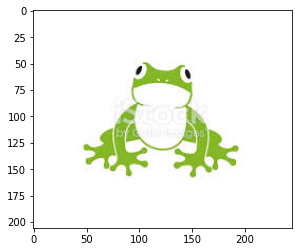

In [ ]:
img=plt.imshow(my_image)

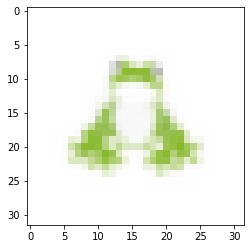

In [ ]:
from skimage.transform import resize
my_image_resized=resize(my_image,(32,32,3))
img=plt.imshow(my_image_resized)

In [ ]:
import numpy as np
probabilities=model.predict(np.array([my_image_resized,]))

probabilities

array([[1.9216508e-01, 4.1647014e-04, 7.3532745e-02, 5.8843978e-03,
        1.5200763e-05, 6.1845355e-04, 7.0839238e-01, 1.2333843e-05,
        1.8119130e-02, 8.4382552e-04]], dtype=float32)

In [ ]:
number_to_class=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index=np.argsort(probabilities[0,:])
print('most likely class',number_to_class[index[9]],'--probability:',probabilities[0,index[9]])

most likely class frog --probability: 0.7083924


In [ ]:
from google.colab import files
uploaded=files.upload()
my_image=plt.imread('airoplane.jpg')

Saving airoplane.jpg to airoplane.jpg


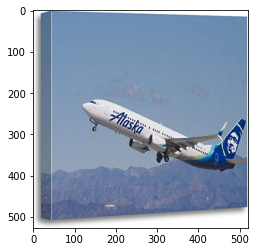

In [ ]:
img=plt.imshow(my_image)

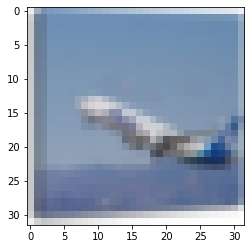

In [ ]:
from skimage.transform import resize
my_image_resized=resize(my_image,(32,32,3))
img=plt.imshow(my_image_resized)

In [ ]:
import numpy as np
probabilities=model.predict(np.array([my_image_resized,]))

probabilities

array([[7.65277445e-01, 1.48441410e-03, 1.21128008e-01, 1.90290957e-04,
        9.62009013e-04, 1.72920181e-06, 1.97652914e-03, 5.18497416e-07,
        1.08866155e-01, 1.12908827e-04]], dtype=float32)

In [ ]:
number_to_class=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index=np.argsort(probabilities[0,:])
print('most likely class',number_to_class[index[9]],'--probability:',probabilities[0,index[9]])

most likely class airplane --probability: 0.76527745


In [ ]:
from google.colab import files
uploaded=files.upload()
my_image=plt.imread('dog.jpeg')

Saving dog.jpeg to dog.jpeg


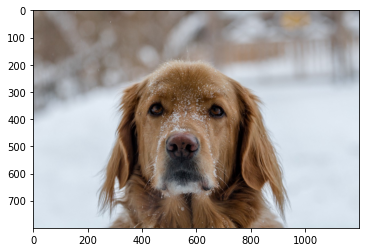

In [ ]:
img=plt.imshow(my_image)

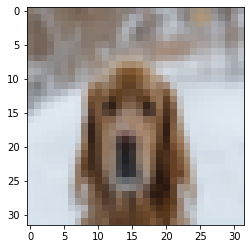

In [ ]:
from skimage.transform import resize
my_image_resized=resize(my_image,(32,32,3))
img=plt.imshow(my_image_resized)

In [ ]:
import numpy as np
probabilities=model.predict(np.array([my_image_resized,]))

probabilities

array([[7.1775648e-06, 1.6951811e-08, 3.4972138e-03, 9.3001872e-02,
        7.0446916e-03, 8.9204812e-01, 2.7458507e-03, 1.6530345e-03,
        2.1129006e-06, 2.9242543e-08]], dtype=float32)

In [ ]:
number_to_class=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index=np.argsort(probabilities[0,:])
print('most likely class',number_to_class[index[9]],'--probability:',probabilities[0,index[9]])

most likely class dog --probability: 0.8920481


Train on 35000 samples, validate on 15000 samples
Epoch 1/10
35000/35000 [==============================] - 53s 2ms/step - loss: 14.5166 - acc: 0.0993 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 2/10
35000/35000 [==============================] - 53s 2ms/step - loss: 14.5132 - acc: 0.0996 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 3/10
35000/35000 [==============================] - 53s 2ms/step - loss: 14.5132 - acc: 0.0996 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 4/10
35000/35000 [==============================] - 52s 1ms/step - loss: 14.5132 - acc: 0.0996 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 5/10
35000/35000 [==============================] - 52s 1ms/step - loss: 14.5132 - acc: 0.0996 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 6/10
35000/35000 [==============================] - 53s 2ms/step - loss: 14.5132 - acc: 0.0996 - val_loss: 14.4902 - val_acc: 0.1010
Epoch 7/10
35000/35000 [==============================] - 53s 2ms/step - loss: 14.5132 - acc: 0.0996 - val_loss: 14.

10000/10000 [==============================] - 5s 510us/step


0.1

In [ ]:
%tensorflow_version 1.x

TensorFlow is already loaded. Please restart the runtime to change versions.
